# I. General Data Visualization

    - 1.1 Dates
    - 1.2 Topics
    - 1.3 Authors
    


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
data = pd.read_csv('../data/preprocessed/10_02PreProUDText.csv')

## 1.1 Dates 
Figure out on which dates the news are from

Remember: Some holes in data! Not Opinion articels doesnt have a date!!!

In [3]:
data['Date']=pd.to_datetime(data['Date'],format='%b %d %Y')

In [4]:
data = data.drop(columns={'Unnamed: 0'})

In [5]:
dates = data.groupby('Date').count()

In [6]:
dates.sort_index(inplace=True)

In [7]:
dates.drop(columns={'URL','Teasertext','Fulltext','Topic','DiveBrief','Author','FullTextWordTokens','FullTextLemma'}, inplace=True)
dates = dates.rename(columns={'Title': 'Count'})
dates['Dates'] = dates.index

<AxesSubplot:xlabel='Date'>

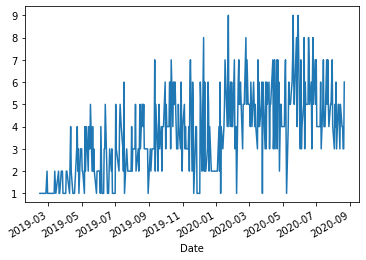

In [8]:
dates['Count'].plot()

1 to 9 articles are published a day, with an average of 3.91

In [9]:
# Plot counts über alle Daten/Datums

In [10]:
dt = datetime.datetime(2019,2,1)
#Generate a data frame with days of the year for a one-sized x-axis
days = pd.DataFrame(columns={'Day'})
for i in range(0,568):
    dtdelta = datetime.timedelta(days=i)
    days.at[i,'Day'] = (dt + dtdelta).strftime("%Y-%m-%d")

In [11]:
dates['Dates'] = dates['Dates'].apply(lambda x: x.strftime("%Y-%m-%d"))

In [12]:
dfinal = days.merge(dates, how='left', left_on='Day', right_on='Dates')

In [13]:
dfinal['Count']=dfinal['Count'].fillna(0)

In [14]:
dfinal['MovingAverage50'] = dfinal['Count'].rolling(50).mean()

<Figure size 720x360 with 0 Axes>

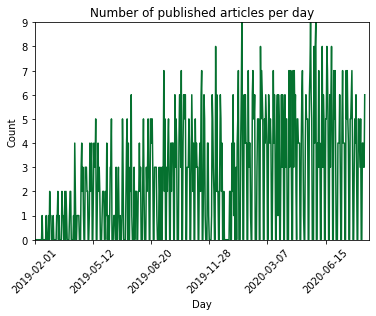

<Figure size 720x360 with 0 Axes>

In [15]:
sns.set_palette(sns.color_palette("BuGn_r"))
dayplot = sns.lineplot(x="Day", y="Count", palette="Set1",data=dfinal)
dayplot.set(xlim=(30,575),ylim=(0,9),xticks=[0,100,200,300,400,500])
plt.setp(dayplot.get_xticklabels(), rotation=45)
plt.title("Number of published articles per day")
plt.figure(figsize=(10, 5))

Text(0.5, 1.0, 'Moving Average Publications per Day')

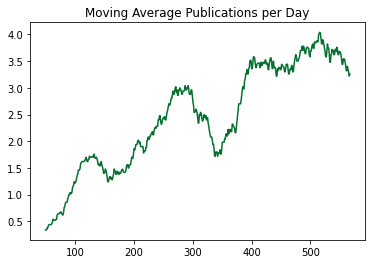

In [16]:
dfinal['MovingAverage50'].plot()
plt.title("Moving Average Publications per Day")

Christmas 2019 is clearly visible 

##  1.2 Topics

In [17]:
topics = data.groupby('Topic').count()

In [18]:
topics['Topic']= topics.index

In [19]:
topics['Title']

Topic
demand-response              175
distributed-energy           229
generation                   158
market-news                  145
policy                        44
solar                         90
storage                      189
technology                   185
transmission-distribution    175
Name: Title, dtype: int64

Text(0.5, 1.0, 'Total Number of articles within Topics')

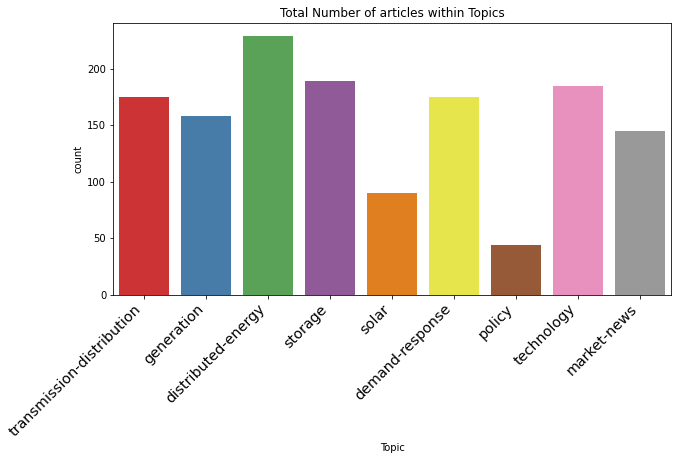

In [20]:
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=data,
    x="Topic",
    palette="Set1"
)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title("Total Number of articles within Topics")

Most articels were published under the topic 'distributed energy', the least under 'policy' (Regulation & Policy)

## 1.3 Authors

In [21]:
authors = data.groupby('Author').count()

In [22]:
authors.drop(columns={'URL','Teasertext','Fulltext','Topic','DiveBrief','Date','FullTextWordTokens','FullTextLemma'}, inplace=True)
authors = authors.rename(columns={'Title': 'Count'})

In [23]:
authors.sort_values(by=['Count'], inplace=True, ascending=False)
authors['Author']= authors.index

In [24]:
authors.size

86

different Authors, but dominated by top authors.

In [25]:
# Authors with more than 20 articles
authors = authors[authors['Count']>20]
authors

Count               Author
Author                                         
robert walton          361        robert walton
iulia gheorghiu        170      iulia gheorghiu
opinion                161              opinion
catherine morehouse    157  catherine morehouse
kavya balaraman        116      kavya balaraman
sponsored               53            sponsored
herman k trabish        50     herman k trabish
matthew bandyk          45       matthew bandyk
hj mai                  42               hj mai
guy burdick             27          guy burdick
chris teale             26          chris teale
larry pearl             25          larry pearl
jason plautz            24         jason plautz
emma penrod             24          emma penrod
john funk               22            john funk

Text(0.5, 1.0, 'Total Number of articles per author')

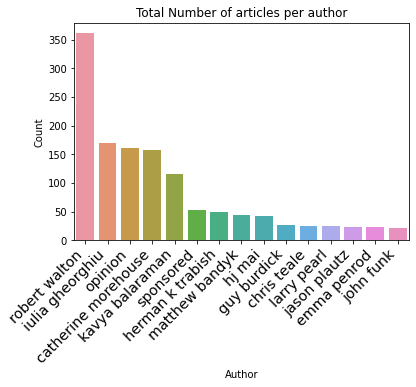

In [26]:
ax = sns.barplot(x="Author", y="Count", data=authors)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large',
)
plt.title("Total Number of articles per author")

Realization: 

- Top Author has authored 25,82% of all articles!! (1398 unique articles)

- Top 4 Authors have authored 60,95% of all articles!!! 

- Top 5 Authors have authored 69,03% of all articles!!!

# Average Words per Text

In [27]:
data.head()

Title  \
0  propelling the transition digitization bolster...   
1  following outrage over hurricane isaias respon...   
2  propelling the transition new and better trans...   
3  pipeline infrastructure planning in the era of...   
4  propelling the transition green hydrogen could...   

                                                 URL            Author  \
0  https://www.utilitydive.com/news/propelling-th...         deep dive   
1  https://www.utilitydive.com/news/following-out...     robert walton   
2  https://www.utilitydive.com/news/propelling-th...     robert walton   
3  https://www.utilitydive.com/news/pipeline-infr...           opinion   
4  https://www.utilitydive.com/news/propelling-th...  herman k trabish   

                                          Teasertext  \
0  the continuing automation and digitization of ...   
1  the bipartisan legislation would alter rules t...   
2  new technologies can make it easier to develop...   
3  scrutiny of the siting of infrastructure proje...   
4  green hydrogen beats renewables plus batteries...   

                                            Fulltext  \
0  increasing digitization in the power sector is...   
1  a bipartisan group of connecticut lawmakers on...   
2  electric transmission lines — capable of carry...   
3  the following is a contributed article by emil...   
4  renewablesgenerated electricity and battery en...   

                       Topic      DiveBrief       Date  \
0  transmission-distribution  no dive brief 2020-08-21   
1  transmission-distribution  no dive brief 2020-08-20   
2  transmission-distribution  no dive brief 2020-08-19   
3  transmission-distribution  no dive brief 2020-08-18   
4  transmission-distribution  no dive brief 2020-08-17   

                                  FullTextWordTokens  \
0  ['increas', 'digit', 'power', 'sector', 'creat...   
1  ['bipartisan', 'group', 'connecticut', 'lawmak...   
2  ['electr', 'transmiss', 'line', '—', 'capabl',...   
3  ['follow', 'contribut', 'articl', 'emili', 'p'...   
4  ['renewablesgener', 'electr', 'batteri', 'ener...   

                                       FullTextLemma  
0  ['increasing', 'digitization', 'power', 'secto...  
1  ['bipartisan', 'group', 'connecticut', 'lawmak...  
2  ['electric', 'transmission', 'line', '—', 'cap...  
3  ['following', 'contributed', 'article', 'emily...  
4  ['renewablesgenerated', 'electricity', 'batter...

In [28]:
data.dtypes

Title                         object
URL                           object
Author                        object
Teasertext                    object
Fulltext                      object
Topic                         object
DiveBrief                     object
Date                  datetime64[ns]
FullTextWordTokens            object
FullTextLemma                 object
dtype: object

In [29]:
data['Fulltext'] = data['Fulltext'].apply(lambda x: str(x))

In [30]:
data['NumberOfWords'] = data['Fulltext'].apply(lambda x: len(x.split()))

In [35]:
data[data['NumberOfWords']<2]['Fulltext']

Series([], Name: Fulltext, dtype: object)

In [36]:
np.mean(data['NumberOfWords'])

723.1187050359712

In [37]:
np.std(data['NumberOfWords'])

451.9482839626015

In [38]:
np.median(data['NumberOfWords'])

600.0

- 723 Words on Average per text
- With a standard deviation of 451 (length of texts vary a lot!) 
- and a median of 600

Text(0.5, 1.0, 'Number of Words per Text')

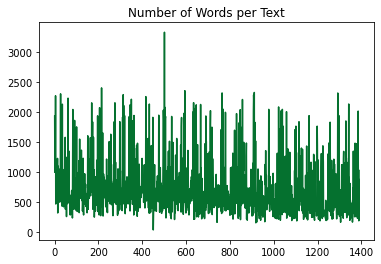

In [39]:
data['NumberOfWords'].plot()
plt.title("Number of Words per Text")

In [40]:
def get_average_words_by_topic(topic):
    topics_count = data[data['Topic']==topic]
    return np.mean(topics_count['NumberOfWords'])

In [41]:
get_average_words_by_topic('demand-response')

657.7657142857142

In [42]:
get_average_words_by_topic('generation')

818.9113924050633

In [43]:
get_average_words_by_topic('distributed-energy')

825.3624454148471

In [44]:
get_average_words_by_topic('solar')

785.7

In [45]:
for row in topics.index:
    topics.at[row,'NumberOfWords'] = get_average_words_by_topic(row)

In [46]:
topics

Title  URL  Author  Teasertext  Fulltext  \
Topic                                                                 
demand-response              175  175     175         175       175   
distributed-energy           229  229     229         229       229   
generation                   158  158     158         158       158   
market-news                  145  145     145         145       145   
policy                        44   44      44          44        44   
solar                         90   90      90          90        90   
storage                      189  189     189         189       189   
technology                   185  185     185         185       185   
transmission-distribution    175  175     175         175       175   

                           DiveBrief  Date  FullTextWordTokens  FullTextLemma  \
Topic                                                                           
demand-response                  175   172                 175            175   
distributed-energy               229   227                 229            229   
generation                       158   158                 158            158   
market-news                      145   144                 145            145   
policy                            44    44                  44             44   
solar                             90    89                  90             90   
storage                          189   182                 189            189   
technology                       185   168                 185            185   
transmission-distribution        175   174                 175            175   

                                               Topic  NumberOfWords  
Topic                                                                
demand-response                      demand-response     657.765714  
distributed-energy                distributed-energy     825.362445  
generation                                generation     818.911392  
market-news                              market-news     555.662069  
policy                                        policy     739.295455  
solar                                          solar     785.700000  
storage                                      storage     673.513228  
technology                                technology     788.983784  
transmission-distribution  transmission-distribution     654.634286

Text(0.5, 1.0, 'Average Number of words per article within Topics')

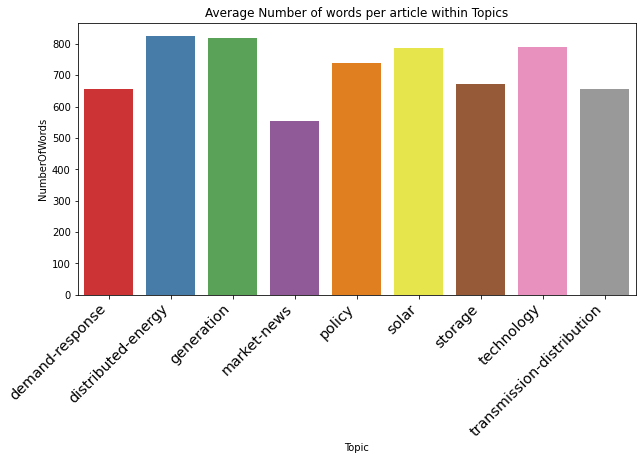

In [47]:
plt.figure(figsize=(10,5))
chart = sns.barplot(
    data=topics,
    x=topics.index,
    y="NumberOfWords",
    palette="Set1"
)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.title("Average Number of words per article within Topics")